In [2]:
%cd ..

c:\Users\dannr\Desktop\llm-synthetic-generation


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
from src.data_ingestion import *

In [5]:
real_500_df = pd.read_csv('data/out/sample.real-500.csv', index_col=0)
real_500_df['real'] = 1
real_1000_df = get_stratified_data('data/train_pool.csv', 1_000, 42)
real_1000_df['real'] = 1
real_2000_df = get_stratified_data('data/train_pool.csv', 2_000, 42)
real_2000_df['real'] = 1

syn_500_df = pd.read_csv('data/out/sample.syn-500.csv', index_col=0).drop('n_tokens', axis=1)
syn_500_df['real'] = 0
syn_1000_df = pd.read_csv('data/out/sample.syn-1000.csv', index_col=0).drop('n_tokens', axis=1)
syn_1000_df['real'] = 0

In [6]:
real_500_syn_500_df = pd.concat([real_500_df, syn_500_df], ignore_index=True)
real_500_syn_1000_df = pd.concat([real_500_df, syn_1000_df], ignore_index=True)
real_500_syn_1500_df = pd.concat([real_500_df, syn_500_df, syn_1000_df], ignore_index=True)

In [7]:
experiments = [
    ('500_', real_500_df, False),
    ('1000_', real_1000_df, False),
    ('2000_', real_2000_df, False),
    ('500_500', real_500_syn_500_df, True),
    ('500_1000', real_500_syn_1000_df, True),
    ('500_1500', real_500_syn_1500_df, True)
]

In [8]:
from src.model_evaluation import *
from sklearn.svm import SVC

import numpy as np

In [37]:
model_eval = ModelEvaluator(SVC(), k=10, random_state=42)
names = []
model_scores = []
for name, df, has_syn in experiments:
    X = df.drop('label', axis=1)
    y = df['label']
    scores = model_eval.evaluate(X, y, has_synthetic=has_syn)
    names.append(name)
    model_scores.append(np.round(np.mean(scores) * 100.0, 2))

In [38]:
data_dict = {
    'names': names,
    'scores': model_scores
}

In [39]:
df = pd.DataFrame(data_dict)
df

,names,scores
0,500_,81.46
1,1000_,82.39
2,2000_,82.36
3,500_500,80.40
4,500_1000,81.22
5,500_1500,81.05


In [41]:
import matplotlib.pyplot as plt

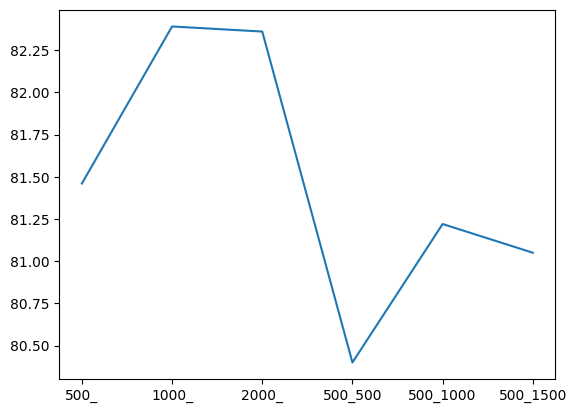

In [47]:
plt.plot(df['names'], df['scores'])